In [2]:
#importando bibliotecas úteis
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#lendo e visualizando dataframe
df = pd.read_csv('titanic-data-6.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(" Este arquivo contém {0} linhas e {1} colunas.".format(df.shape[0], df.shape[1]))

 Este arquivo contém 891 linhas e 12 colunas.


In [4]:
#Verificando se alguma coluna contém elementos nulos
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [5]:
#Verificando total de nulos para coluna 'Age'
df['Age'].isna().sum()

177

In [6]:
#Verificando total de nulos para coluna 'Cabin'
df['Cabin'].isna().sum()

687

In [7]:
#Verificando total de nulos para coluna 'Embarked'
df['Embarked'].isna().sum()

2

In [8]:
#Verificando se há dados duplicados
print("Dados duplicados: {0}".format(df.duplicated().sum()))

Dados duplicados: 0


In [9]:
#Eliminando colunas irrelevantes e coluna com excesso de dados faltantes('Cabin')
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare'], axis=1, inplace=True)  
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [10]:
#Renomeando rótulos da coluna 
df.columns = ['Sobrevivente', 'Classe', 'Sexo', 'Idade', 'Nº Irmãos/Conjuge', 'Nº Pais/Filhos', 'Local de Embarque']
df.head()

,Sobrevivente,Classe,Sexo,Idade,Nº Irmãos/Conjuge,Nº Pais/Filhos,Local de Embarque
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [11]:
#Pequenas alterações para facilitar a visualização dos dados
df['Sobrevivente'] = df['Sobrevivente'].replace([0,1], ['Não', 'Sim'])
df['Local de Embarque'] = df['Local de Embarque'].replace(['S', 'C', 'Q'], ['Southampton', 'Cherbourg', 'Queenstown'])
df['Sexo'] = df['Sexo'].replace(['male', 'female'], ['Masculino', 'Feminino'])
df.dtypes #verificando se foram corretamente modificados, pois alguns tipos foram alterados para string

Sobrevivente          object
Classe                 int64
Sexo                  object
Idade                float64
Nº Irmãos/Conjuge      int64
Nº Pais/Filhos         int64
Local de Embarque     object
dtype: object

In [12]:
#Criando nova coluna para unir parentes e conjuge dos passageiros
df['Familiares'] = df['Nº Irmãos/Conjuge'] +df['Nº Pais/Filhos']
df.head()

,Sobrevivente,Classe,Sexo,Idade,Nº Irmãos/Conjuge,Nº Pais/Filhos,Local de Embarque,Familiares
0,Não,3,Masculino,22.0,1,0,Southampton,1
1,Sim,1,Feminino,38.0,1,0,Cherbourg,1
2,Sim,3,Feminino,26.0,0,0,Southampton,0
3,Sim,1,Feminino,35.0,1,0,Southampton,1
4,Não,3,Masculino,35.0,0,0,Southampton,0


In [13]:
#Verificando total de sobreviventes e não sobreviventes
(df['Sobrevivente']=='Sim').value_counts()

False    549
True     342
Name: Sobrevivente, dtype: int64

In [17]:
#Exibindo alguns dados estatísticos a respeito do conjunto de dados
df.describe()

,Classe,Idade,Nº Irmãos/Conjuge,Nº Pais/Filhos,Familiares
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,0.904602
std,0.836071,14.526497,1.102743,0.806057,1.613459
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,0.000000
75%,3.000000,38.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,10.000000




********************************** VISUALIZAÇÃO DOS GRÁFICOS **********************************



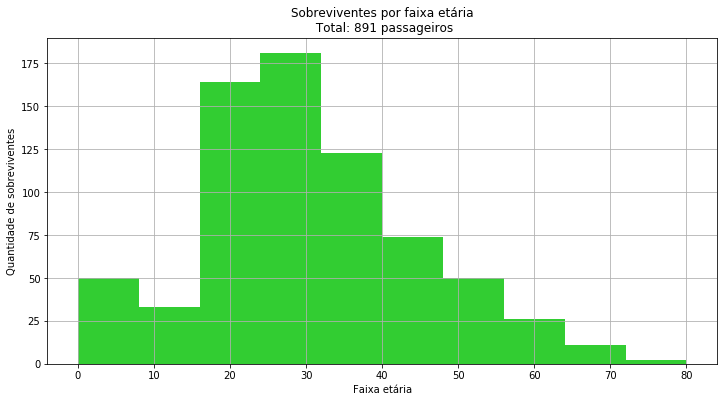

In [52]:
print("\n\n********************************** VISUALIZAÇÃO DOS GRÁFICOS **********************************\n")
ages_surv = df[df['Idade']>0.0]['Idade'].astype(int).hist(bins=10, figsize=(12,6), color ='limegreen')
plt.title('Sobreviventes por faixa etária\n Total: %s passageiros' %df.shape[0])
plt.xlabel('Faixa etária')
plt.ylabel('Quantidade de sobreviventes')
plt.show()

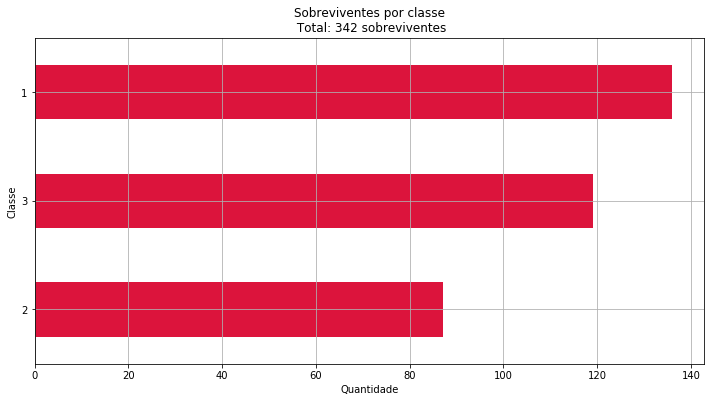

In [42]:
class_surv = df[df['Sobrevivente']=='Sim']['Classe'].value_counts().sort_values(ascending=True)
class_surv.plot(kind='barh', figsize=(12,6), color='crimson', rot=0, grid=True)
plt.title('Sobreviventes por classe\n Total: %s sobreviventes' %class_surv.sum())
plt.xlabel('Quantidade')
plt.ylabel('Classe')
plt.show()

In [20]:
classe = (df['Classe'] == 1) | (df['Classe'] == 2) | (df['Classe'] == 3)
classe = df[classe]
classe.head()

,Sobrevivente,Classe,Sexo,Idade,Nº Irmãos/Conjuge,Nº Pais/Filhos,Local de Embarque,Familiares
0,Não,3,Masculino,22.0,1,0,Southampton,1
1,Sim,1,Feminino,38.0,1,0,Cherbourg,1
2,Sim,3,Feminino,26.0,0,0,Southampton,0
3,Sim,1,Feminino,35.0,1,0,Southampton,1
4,Não,3,Masculino,35.0,0,0,Southampton,0


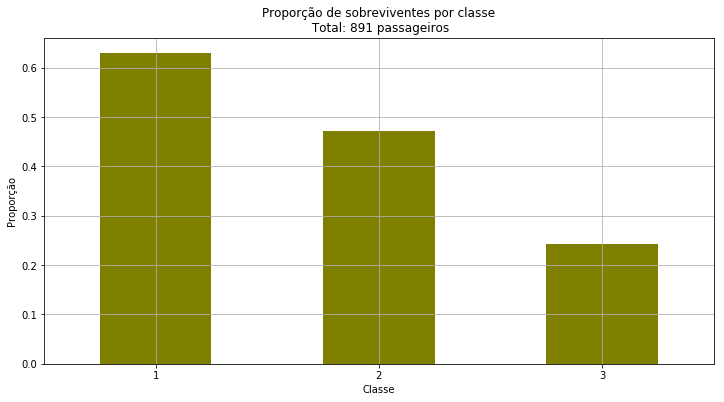

In [21]:
classe.groupby('Classe')['Sobrevivente'].apply(lambda x: np.mean(x=='Sim')).plot(kind='bar', color = 'olive', figsize = (12,6), rot=0, grid=True)
plt.title('Proporção de sobreviventes por classe\n Total: %s passageiros' %classe.shape[0])
plt.ylabel('Proporção')
plt.show()

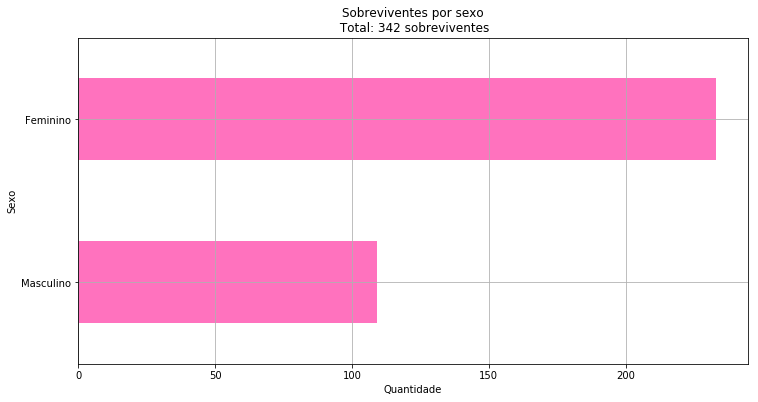

In [22]:
sex_surv = df[df['Sobrevivente']=='Sim']['Sexo'].value_counts().sort_values(ascending=True)
sex_surv.plot(kind='barh', figsize=(12,6), color='deeppink', alpha=.6, rot=0, grid=True)
plt.title('Sobreviventes por sexo\n Total: %s sobreviventes' %sex_surv.sum())
plt.xlabel('Quantidade')
plt.ylabel('Sexo')
plt.show()

In [23]:
sexo = (df['Sexo'] == 'Feminino') | (df['Sexo'] == 'Masculino')
sexo = df[sexo]
sexo.head()

,Sobrevivente,Classe,Sexo,Idade,Nº Irmãos/Conjuge,Nº Pais/Filhos,Local de Embarque,Familiares
0,Não,3,Masculino,22.0,1,0,Southampton,1
1,Sim,1,Feminino,38.0,1,0,Cherbourg,1
2,Sim,3,Feminino,26.0,0,0,Southampton,0
3,Sim,1,Feminino,35.0,1,0,Southampton,1
4,Não,3,Masculino,35.0,0,0,Southampton,0


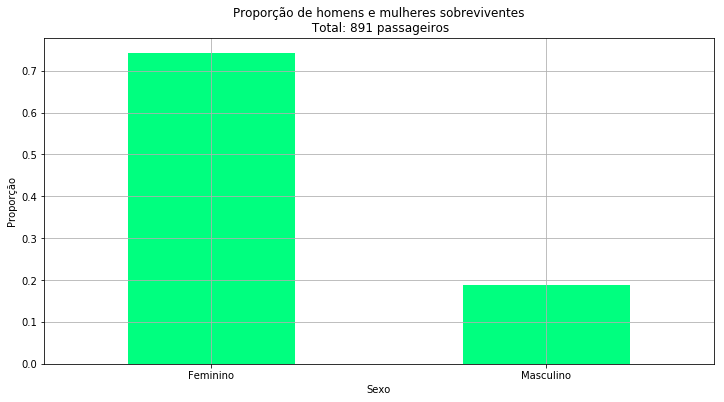

In [24]:
sexo.groupby('Sexo')['Sobrevivente'].apply(lambda x: np.mean(x=='Sim')).plot(kind='bar', color = 'springgreen', figsize = (12,6), rot=0, grid=True)
plt.title('Proporção de homens e mulheres sobreviventes\n Total: %s passageiros' %sexo.shape[0])
plt.ylabel('Proporção')
plt.show()

In [59]:
(df['Sexo']=='Feminino').value_counts()

False    577
True     314
Name: Sexo, dtype: int64

In [60]:
(df['Sexo']=='Masculino').value_counts()

True     577
False    314
Name: Sexo, dtype: int64

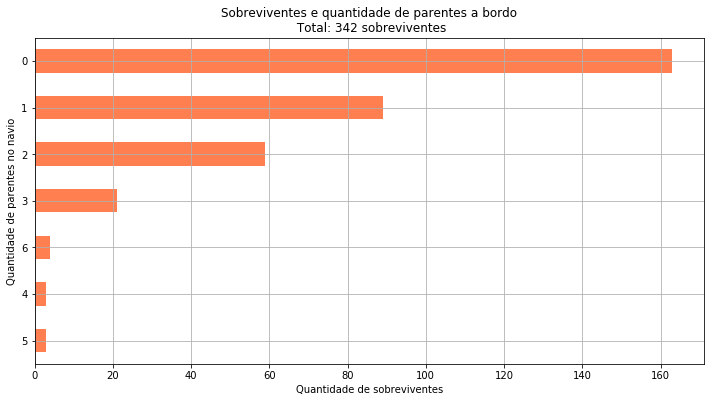

In [25]:
family_surv = df[df['Sobrevivente']=='Sim']['Familiares'].value_counts().sort_values(ascending=True)
family_surv.plot(kind='barh', figsize=(12,6), color='coral', rot=0, grid=True)
plt.title('Sobreviventes e quantidade de parentes a bordo\n Total: %s sobreviventes' %family_surv.sum())
plt.xlabel('Quantidade de sobreviventes')
plt.ylabel('Quantidade de parentes no navio')
plt.show()

In [26]:
family = (df['Familiares'] == 0)|(df['Familiares'] == 1)|(df['Familiares'] == 2)|(df['Familiares'] == 3)|(df['Familiares'] == 4)|(df['Familiares'] == 5)|(df['Familiares'] == 6)
family = df[family]
family.head()

,Sobrevivente,Classe,Sexo,Idade,Nº Irmãos/Conjuge,Nº Pais/Filhos,Local de Embarque,Familiares
0,Não,3,Masculino,22.0,1,0,Southampton,1
1,Sim,1,Feminino,38.0,1,0,Cherbourg,1
2,Sim,3,Feminino,26.0,0,0,Southampton,0
3,Sim,1,Feminino,35.0,1,0,Southampton,1
4,Não,3,Masculino,35.0,0,0,Southampton,0


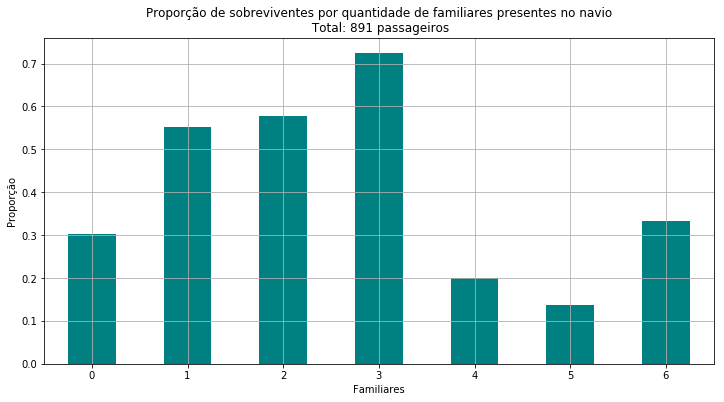

In [27]:
family.groupby('Familiares')['Sobrevivente'].apply(lambda x: np.mean(x=='Sim')).plot(kind='bar', color = 'teal', figsize = (12,6), rot=0, grid=True)
plt.title('Proporção de sobreviventes por quantidade de familiares presentes no navio\n Total: %s passageiros' %df.shape[0])
plt.ylabel('Proporção')
plt.show()

In [28]:
irmaos_conj = (df['Nº Irmãos/Conjuge'] == 0)|(df['Nº Irmãos/Conjuge'] == 1)|(df['Nº Irmãos/Conjuge'] == 2)|(df['Nº Irmãos/Conjuge'] == 3)|(df['Nº Irmãos/Conjuge'] == 4)
irmaos_conj = df[irmaos_conj]
irmaos_conj.head()

,Sobrevivente,Classe,Sexo,Idade,Nº Irmãos/Conjuge,Nº Pais/Filhos,Local de Embarque,Familiares
0,Não,3,Masculino,22.0,1,0,Southampton,1
1,Sim,1,Feminino,38.0,1,0,Cherbourg,1
2,Sim,3,Feminino,26.0,0,0,Southampton,0
3,Sim,1,Feminino,35.0,1,0,Southampton,1
4,Não,3,Masculino,35.0,0,0,Southampton,0


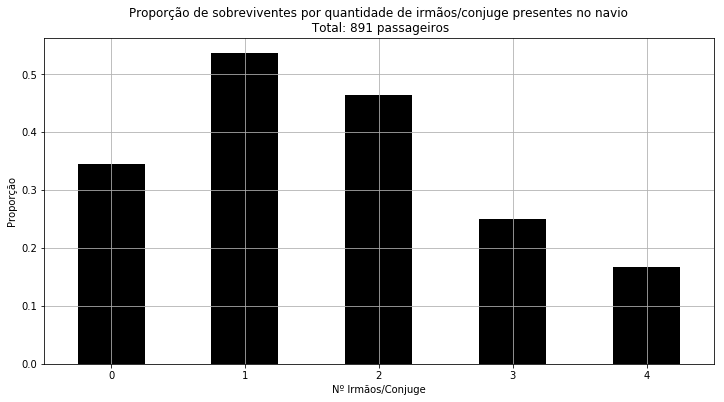

In [29]:
irmaos_conj.groupby('Nº Irmãos/Conjuge')['Sobrevivente'].apply(lambda x: np.mean(x=='Sim')).plot(kind='bar', color = 'k', figsize = (12,6), rot=0, grid=True)
plt.title('Proporção de sobreviventes por quantidade de irmãos/conjuge presentes no navio\n Total: %s passageiros' %df.shape[0])
plt.ylabel('Proporção')
plt.show()

In [30]:
pais_filhos = (df['Nº Pais/Filhos'] == 0)|(df['Nº Pais/Filhos'] == 1)|(df['Nº Pais/Filhos'] == 2)|(df['Nº Pais/Filhos'] == 3)|(df['Nº Pais/Filhos'] == 4)|(df['Nº Pais/Filhos'] == 5)
pais_filhos = df[pais_filhos]
pais_filhos.head()

,Sobrevivente,Classe,Sexo,Idade,Nº Irmãos/Conjuge,Nº Pais/Filhos,Local de Embarque,Familiares
0,Não,3,Masculino,22.0,1,0,Southampton,1
1,Sim,1,Feminino,38.0,1,0,Cherbourg,1
2,Sim,3,Feminino,26.0,0,0,Southampton,0
3,Sim,1,Feminino,35.0,1,0,Southampton,1
4,Não,3,Masculino,35.0,0,0,Southampton,0


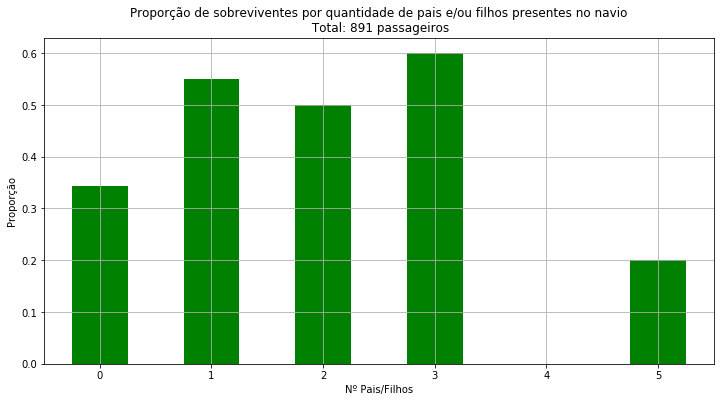

In [31]:
pais_filhos.groupby('Nº Pais/Filhos')['Sobrevivente'].apply(lambda x: np.mean(x=='Sim')).plot(kind='bar', color = 'g', figsize = (12,6), rot=0, grid=True)
plt.title('Proporção de sobreviventes por quantidade de pais e/ou filhos presentes no navio\n Total: %s passageiros' %df.shape[0])
plt.ylabel('Proporção')
plt.show()

In [32]:
embarque = (df['Local de Embarque'] == 'Southampton') | (df['Local de Embarque'] == 'Cherbourg') | (df['Local de Embarque'] == 'Queenstown')
embarque = df[embarque]
embarque.head()

,Sobrevivente,Classe,Sexo,Idade,Nº Irmãos/Conjuge,Nº Pais/Filhos,Local de Embarque,Familiares
0,Não,3,Masculino,22.0,1,0,Southampton,1
1,Sim,1,Feminino,38.0,1,0,Cherbourg,1
2,Sim,3,Feminino,26.0,0,0,Southampton,0
3,Sim,1,Feminino,35.0,1,0,Southampton,1
4,Não,3,Masculino,35.0,0,0,Southampton,0


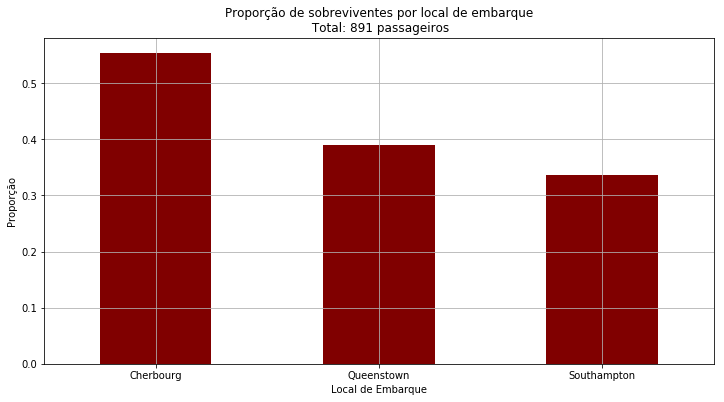

In [33]:
embarque.groupby('Local de Embarque')['Sobrevivente'].apply(lambda x: np.mean(x=='Sim')).plot(kind='bar', color = 'maroon', figsize = (12,6), rot=0, grid=True)
plt.title('Proporção de sobreviventes por local de embarque\n Total: %s passageiros' %df.shape[0])
plt.ylabel('Proporção')
plt.show()

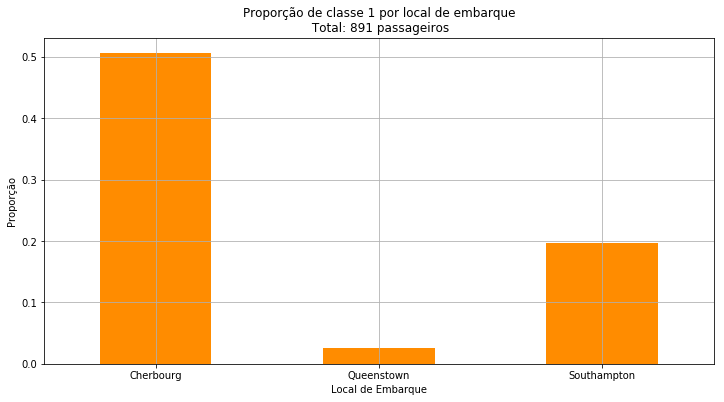

In [34]:
embarque.groupby('Local de Embarque')['Classe'].apply(lambda x: np.mean(x==1)).plot(kind='bar', color = 'darkorange', figsize = (12,6), rot=0, grid=True)
plt.title('Proporção de classe 1 por local de embarque\n Total: %s passageiros' %df.shape[0])
plt.ylabel('Proporção')
plt.show()